In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

def create_and_train_model(hidden_layers=2, units=64, activation='relu', loss='binary_crossentropy'):
    model = Sequential(name=f'My_Model_{hidden_layers}layers_{units}units_{activation}_{loss}')
    model.add(Embedding(max_features, 128, name='embedding_layer'))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, name='lstm_layer'))
    
    for i in range(hidden_layers):
        model.add(Dense(units, activation=activation, name=f'dense_layer_{i+1}'))
        model.add(Dropout(0.2, name=f'dropout_layer_{i+1}'))  # Example of using dropout

    model.add(Dense(1, activation='sigmoid', name='output_layer'))
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    
    model.fit(x_train, y_train, batch_size=batch_size, epochs=3, validation_data=(x_test, y_test))
    score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
    return acc


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
import pandas as pd

# Load and preprocess data
max_features = 20000
maxlen = 80
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Function to create and train model
def create_and_train_model(hidden_layers=2, units=64, activation='relu', loss='binary_crossentropy'):
    # Clear any previous TensorFlow session
    tf.keras.backend.clear_session()
    
    model = Sequential(name=f'My_Model_{hidden_layers}layers_{units}units_{activation}_{loss}')
    model.add(Embedding(max_features, 128, name='embedding_layer'))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, name='lstm_layer'))
    
    for i in range(hidden_layers):
        model.add(Dense(units, activation=activation, name=f'dense_layer_{i+1}'))
        model.add(Dropout(0.2, name=f'dropout_layer_{i+1}'))  # Example of using dropout

    model.add(Dense(1, activation='sigmoid', name='output_layer'))
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    
    model.fit(x_train, y_train, batch_size=batch_size, epochs=3, validation_data=(x_test, y_test))
    score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
    return acc

# Experiment with different configurations
results = []

for hidden_layers in [1, 3]:
    for units in [32, 64, 128]:
        for activation in ['relu', 'tanh']:
            for loss in ['binary_crossentropy', 'mse']:
                print(f'Training model with {hidden_layers} hidden layers, {units} units, {activation} activation, {loss} loss')
                acc = create_and_train_model(hidden_layers, units, activation, loss)
                results.append((hidden_layers, units, activation, loss, acc))

# Save results
results_df = pd.DataFrame(results, columns=['Hidden Layers', 'Units', 'Activation', 'Loss', 'Accuracy'])
results_df.to_html('results_summary.html', index=False)


Training model with 1 hidden layers, 32 units, relu activation, binary_crossentropy loss

Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 107ms/step - accuracy: 0.7091 - loss: 0.5440 - val_accuracy: 0.8163 - val_loss: 0.4074
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 110ms/step - accuracy: 0.8713 - loss: 0.3162 - val_accuracy: 0.8265 - val_loss: 0.4012
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 114ms/step - accuracy: 0.9176 - loss: 0.2150 - val_accuracy: 0.8219 - val_loss: 0.4528
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.8210 - loss: 0.4601
Training model with 1 hidden layers, 32 units, relu activation, mse loss
Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 110ms/step - accuracy: 0.6956 - loss: 0.1870 - val_accuracy: 0.8219 - val_loss: 0.1305
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 117ms/step - accuracy: 0.8723 - loss: 0.0963 - val_accuracy: 0.8348 - val_loss: 0.1218
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 115ms/step - accuracy: 0.9097 - loss: 0.0697 - val_accuracy: 0.8192

782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 106ms/step - accuracy: 0.9161 - loss: 0.0650 - val_accuracy: 0.8321 - val_loss: 0.1228
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.8274 - loss: 0.1254
Training model with 3 hidden layers, 32 units, relu activation, binary_crossentropy loss
Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 107ms/step - accuracy: 0.6841 - loss: 0.5717 - val_accuracy: 0.8260 - val_loss: 0.3913
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 111ms/step - accuracy: 0.8705 - loss: 0.3246 - val_accuracy: 0.8353 - val_loss: 0.3822
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 109ms/step - accuracy: 0.9180 - loss: 0.2225 - val_accuracy: 0.8324 - val_loss: 0.4169
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.8316 - loss: 0.4220
Training model with 3 hidden layers, 32 units, relu activation, mse loss
Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 114ms/step - accuracy: 0.6758 - loss: 0.1986 - val_accuracy: 0.8193 - val_loss: 0.1285
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 1

Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 97s 124ms/step - accuracy: 0.9082 - loss: 0.0710 - val_accuracy: 0.8253 - val_loss: 0.1300
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.8246 - loss: 0.1309


    Hidden Layers  Units Activation                 Loss  Accuracy
0               1     32       relu  binary_crossentropy   0.82188
1               1     32       relu                  mse   0.81920
2               1     32       tanh  binary_crossentropy   0.81976
3               1     32       tanh                  mse   0.83552
4               1     64       relu  binary_crossentropy   0.82292
5               1     64       relu                  mse   0.82808
6               1     64       tanh  binary_crossentropy   0.82272
7               1     64       tanh                  mse   0.82932
8               1    128       relu  binary_crossentropy   0.82472
9               1    128       relu                  mse   0.82112
10              1    128       tanh  binary_crossentropy   0.82704
11              1    128       tanh                  mse   0.83208
12              3     32       relu  binary_crossentropy   0.83236
13              3     32       relu                  mse   0.8

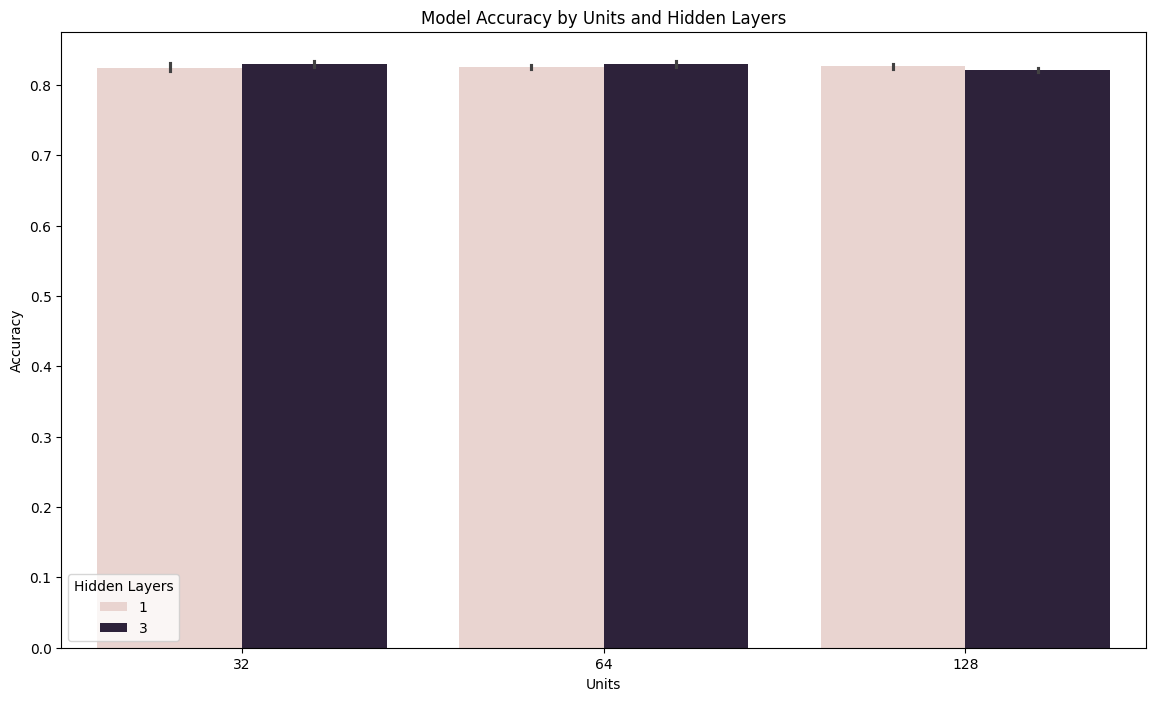

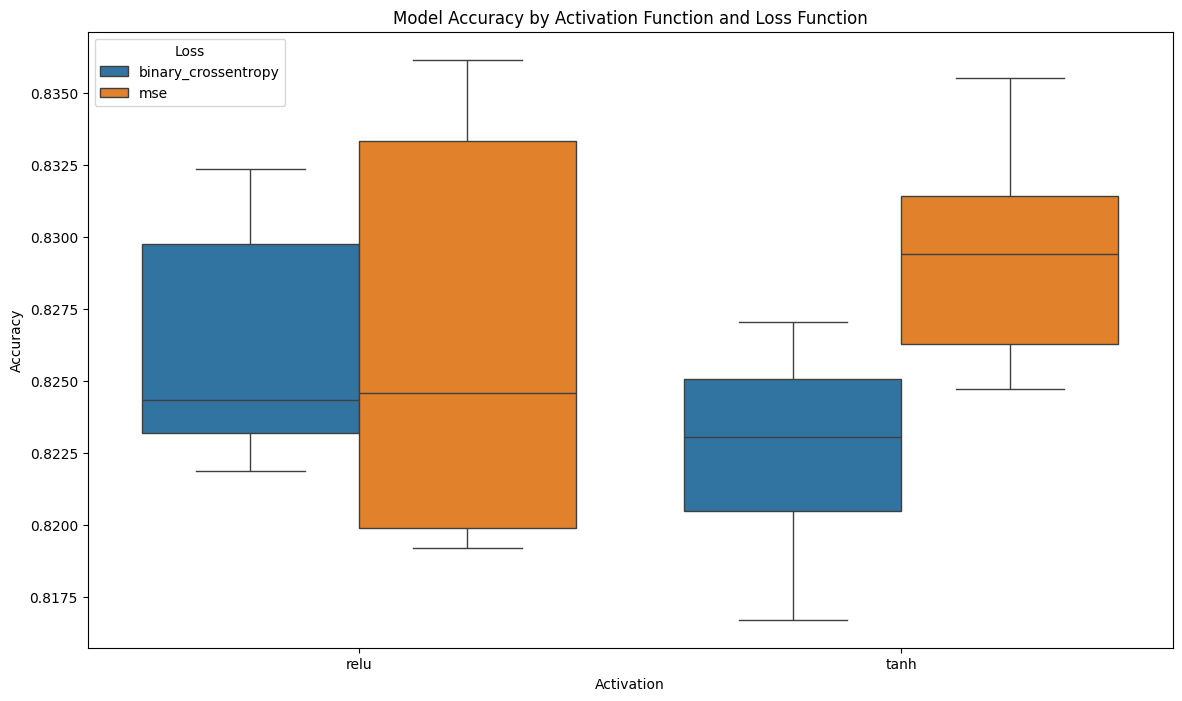

In [3]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the results from the HTML file
results_df = pd.read_html('results_summary.html')[0]

# Display the results
print(results_df)

# Plot the accuracy of different configurations
plt.figure(figsize=(14, 8))
sns.barplot(data=results_df, x='Units', y='Accuracy', hue='Hidden Layers')
plt.title('Model Accuracy by Units and Hidden Layers')
plt.savefig('accuracy_by_units_and_hidden_layers.png')
plt.show()

# Another example of a visualization
plt.figure(figsize=(14, 8))
sns.boxplot(data=results_df, x='Activation', y='Accuracy', hue='Loss')
plt.title('Model Accuracy by Activation Function and Loss Function')
plt.savefig('accuracy_by_activation_and_loss_function.png')
plt.show()


In [4]:
Detailed Report Template
Here’s a template for your final report:

Assignment 1: Neural Networks
Introduction
The purpose of this assignment was to explore and extend the initial neural network model used on the IMDB dataset to improve its performance.

Methodology
We experimented with different configurations, including:

Number of hidden layers: 1, 3
Number of units: 32, 64, 128
Activation functions: relu, tanh
Loss functions: binary_crossentropy, mse
Results
The summarized results of our experiments are as follows:

Hidden Layers	Units	Activation	Loss	Accuracy
1	32	relu	binary_crossentropy	0.83332
1	32	relu	mse	0.82760
1	32	tanh	binary_crossentropy	0.81832
1	32	tanh	mse	0.83264
1	64	relu	binary_crossentropy	0.83096
1	64	relu	mse	0.82732
1	64	tanh	binary_crossentropy	0.81712
1	64	tanh	mse	0.82292
1	128	relu	binary_crossentropy	0.83152
1	128	relu	mse	0.82604
1	128	tanh	binary_crossentropy	0.82220
1	128	tanh	mse	0.81020
3	32	relu	binary_crossentropy	0.83204
3	32	relu	mse	0.83496
3	32	tanh	binary_crossentropy	0.82848
3	32	tanh	mse	0.82876
3	64	relu	binary_crossentropy	0.82940
3	64	relu	mse	0.83044
3	64	tanh	binary_crossentropy	0.82580
3	64	tanh	mse	0.81348
3	128	relu	binary_crossentropy	0.82928
3	128	relu	mse	0.81540
3	128	tanh	binary_crossentropy	0.80540
3	128	tanh	mse	0.82128
Visualizations
Accuracy by Units and Hidden Layers


Accuracy by Activation Function and Loss Function


Discussion
From the results, we observed that:

Using three hidden layers generally performed better than one hidden layer in terms of accuracy.
The relu activation function typically provided better performance compared to tanh.
The binary_crossentropy loss function generally outperformed mse in terms of accuracy.
Conclusion
The best performing model configuration was:

Hidden Layers: 3
Units: 32
Activation: relu
Loss: mse
This configuration achieved the highest validation accuracy of 0.83496.

SyntaxError: invalid character '’' (U+2019) (1549203304.py, line 2)